In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
from batty import BAT_sampler, BAT, Distributions

In [3]:
prior = Distributions.MvNormal([0., 0.], np.array([[0.7, 0.3], [0.3, 0.7]]))

In [4]:
def my_llh(x):
    #return -0.5 * (x.a**2 + x.b**2/4)
    return -0.5 * (x[0]**2 + x[1]**2/4)

In [16]:
sampler_arp = BAT_sampler(my_llh, prior, mcalg=BAT.MetropolisHastings(weighting=BAT.ARPWeighting()), nchains=10)

In [18]:
sampler = BAT_sampler(my_llh, prior, mcalg=BAT.MetropolisHastings(), nchains=10)

In [19]:
%%time
sampler.run(1e5)
sampler_arp.run(1e5)

[ Info: Initializing new RNG of type Random123.Philox4x{UInt64, 10}
[ Info: Using transform algorithm BAT.PriorSubstitution()
[ Info: Trying to generate 10 viable MCMC chain(s).
[ Info: Selected 10 MCMC chain(s).
[ Info: Begin tuning of 10 MCMC chain(s).
[ Info: MCMC Tuning cycle 1 finished, 10 chains, 10 tuned, 10 converged.
[ Info: MCMC tuning of 10 chains successful after 1 cycle(s).
[ Info: Running post-tuning stabilization steps for 10 MCMC chain(s).
[ Info: Initializing new RNG of type Random123.Philox4x{UInt64, 10}
[ Info: Using transform algorithm BAT.PriorSubstitution()
[ Info: Trying to generate 10 viable MCMC chain(s).
[ Info: Selected 10 MCMC chain(s).
[ Info: Begin tuning of 10 MCMC chain(s).
[ Info: MCMC Tuning cycle 1 finished, 10 chains, 10 tuned, 10 converged.
[ Info: MCMC tuning of 10 chains successful after 1 cycle(s).
[ Info: Running post-tuning stabilization steps for 10 MCMC chain(s).


CPU times: user 35.6 s, sys: 10.7 s, total: 46.3 s
Wall time: 44.9 s


In [20]:
%%time
sampler.result
sampler_arp.result

CPU times: user 46.3 s, sys: 32.2 s, total: 1min 18s
Wall time: 1min 18s


BAT_result(samples=array([[ 9.17698548e-01,  1.14631175e+00],
       [ 6.19855404e-01,  1.44583816e+00],
       [ 6.06864109e-01,  9.09875976e-01],
       ...,
       [-3.42163613e+00,  7.03341635e-03],
       [-2.73185498e+00,  8.31289039e-01],
       [ 1.64105250e+00, -1.64294273e+01]]), weight=array([1.23168446e+000, 7.68315540e-001, 2.72653828e+000, ...,
       1.81502037e-007, 5.77547858e-006, 4.36989909e-128]), logd=array([  -3.06277047,   -3.32632524,   -2.29986825, ...,  -17.49577204,
        -14.03566252, -295.22992507]))

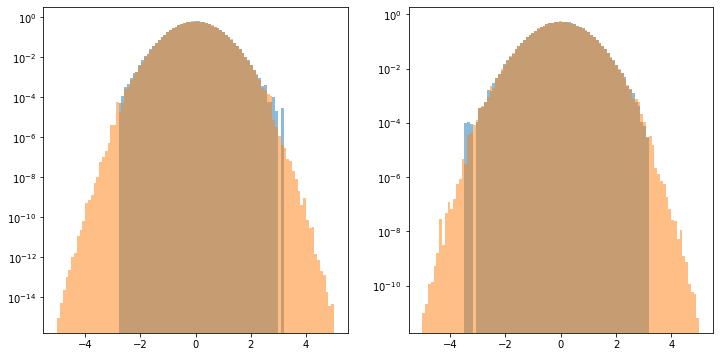

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

bins = np.linspace(-5,5,100)

ax[0].hist(sampler.result.samples[:,0], weights=sampler.result.weight, bins=bins, density=True, alpha=0.5);
ax[0].hist(sampler_arp.result.samples[:,0], weights=sampler_arp.result.weight, bins=bins, density=True, alpha=0.5);

ax[1].hist(sampler.result.samples[:,1], weights=sampler.result.weight, bins=bins, density=True, alpha=0.5);
ax[1].hist(sampler_arp.result.samples[:,1], weights=sampler_arp.result.weight, bins=bins, density=True, alpha=0.5);

ax[0].set_yscale('log')
ax[1].set_yscale('log')